In [63]:
# Install packages 
# If you do not have these packages in your python environment,
# uncomment the following lines of code and run this cell.

# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install missingno
# !pip install imbalanced-learn
# !pip install sklearn
# !pip install xgboost
# !pip install tensorflow

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import imblearn
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from xgboost import XGBClassifier

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [65]:
# Place train and test datasets in the same folder as this file
# Import train dataset

df_train = pd.read_csv('./data/dataset_train_1.csv', index_col=[0])
print(f"Shape of dataset: {df_train.shape}")
df_train.head(5)

Shape of dataset: (2998, 21)


Var1   Var2   Var3                              Var4 Var5 Var6  Var7   Var8  \
1   K1  128.0  415.0  01dc820b1aa6175cef997a09f88da685   no  yes  25.0  265.1   
2  NaN    NaN  415.0  6d146b9e63153486681d1f756d307806   no  yes  26.0  161.6   
3   N5  137.0  415.0  8b5d5b1825d00c99b28cd8464215739b   no   no   0.0  243.4   
4   O1   84.0  408.0                               NaN  yes   no   NaN  299.4   
5   O2   75.0  415.0  ffd5bfdb4243cbe84b2e1fbabaac2d2a  yes   no   0.0  166.7   

    Var9  Var10  ...  Var12  Var13  Var14  Var15  Var16  Var17  Var18  Var19  \
1  110.0  45.07  ...   99.0  16.78  244.7   91.0  11.01   10.0    3.0   2.70   
2  123.0  27.47  ...  103.0  16.62  254.4  103.0  11.45   13.7    3.0   3.70   
3  114.0  41.38  ...  110.0  10.30  162.6  104.0   7.32   12.2    5.0   3.29   
4   71.0  50.90  ...   88.0   5.26  196.9   89.0   8.86    6.6    7.0   1.78   
5  113.0  28.34  ...  122.0  12.61  186.9  121.0   8.41   10.1    3.0   2.73   

   Var20  Target  
1    1.0  False.  
2    1.0  False.  
3    0.0  False.  
4    NaN  False.  
5    3.0  False.  

[5 rows x 21 columns]

In [66]:
# Summary statistics for numerical features
df_train.describe()

Var2         Var3         Var7         Var8         Var9  \
count  2764.000000  2992.000000  2724.000000  2787.000000  2727.000000   
mean    100.686686   437.115307     8.052863   180.233943   100.059773   
std      39.721081    42.333905    13.644352    54.491987    20.245062   
min       1.000000   408.000000     0.000000     0.000000     0.000000   
25%      73.000000   408.000000     0.000000   144.500000    87.000000   
50%     100.000000   415.000000     0.000000   179.400000   100.000000   
75%     127.000000   510.000000    19.000000   216.350000   114.000000   
max     243.000000   510.000000    51.000000   350.800000   165.000000   

             Var10        Var11        Var12        Var13        Var14  \
count  2915.000000  2836.000000  2839.000000  2830.000000  2710.000000   
mean     30.612631   200.931911    99.892568    17.043742   200.596494   
std       9.288033    50.924026    19.875673     4.341361    50.491350   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.560000   166.475000    87.000000    14.100000   167.100000   
50%      30.500000   201.400000   100.000000    17.090000   200.650000   
75%      36.805000   235.500000   113.000000    19.977500   234.900000   
max      59.640000   363.700000   168.000000    30.910000   395.000000   

             Var15        Var16        Var17        Var18        Var19  \
count  2997.000000  2872.000000  2909.000000  2788.000000  2958.000000   
mean    100.001668     9.033955    10.230320     4.488522     2.764047   
std      19.569405     2.281975     2.786336     2.455388     0.750529   
min      33.000000     1.040000     0.000000     0.000000     0.000000   
25%      87.000000     7.520000     8.500000     3.000000     2.300000   
50%     100.000000     9.030000    10.300000     4.000000     2.780000   
75%     113.000000    10.590000    12.000000     6.000000     3.270000   
max     175.000000    17.770000    20.000000    19.000000     5.400000   

             Var20  
count  2753.000000  
mean      1.550672  
std       1.309511  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       9.000000

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 1 to 2998
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    2774 non-null   object 
 1   Var2    2764 non-null   float64
 2   Var3    2992 non-null   float64
 3   Var4    2767 non-null   object 
 4   Var5    2978 non-null   object 
 5   Var6    2807 non-null   object 
 6   Var7    2724 non-null   float64
 7   Var8    2787 non-null   float64
 8   Var9    2727 non-null   float64
 9   Var10   2915 non-null   float64
 10  Var11   2836 non-null   float64
 11  Var12   2839 non-null   float64
 12  Var13   2830 non-null   float64
 13  Var14   2710 non-null   float64
 14  Var15   2997 non-null   float64
 15  Var16   2872 non-null   float64
 16  Var17   2909 non-null   float64
 17  Var18   2788 non-null   float64
 18  Var19   2958 non-null   float64
 19  Var20   2753 non-null   float64
 20  Target  2948 non-null   object 
dtypes: float64(16), object(5)
memory usag

It can be noted that there are 50 null values in the 'Target' column. These rows will be dropped as there is no label that the features can be trained on.

In [68]:
df_train = df_train[df_train['Target'].notna()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 1 to 2998
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var1    2729 non-null   object 
 1   Var2    2721 non-null   float64
 2   Var3    2942 non-null   float64
 3   Var4    2724 non-null   object 
 4   Var5    2928 non-null   object 
 5   Var6    2760 non-null   object 
 6   Var7    2679 non-null   float64
 7   Var8    2741 non-null   float64
 8   Var9    2683 non-null   float64
 9   Var10   2866 non-null   float64
 10  Var11   2787 non-null   float64
 11  Var12   2795 non-null   float64
 12  Var13   2785 non-null   float64
 13  Var14   2666 non-null   float64
 14  Var15   2947 non-null   float64
 15  Var16   2826 non-null   float64
 16  Var17   2860 non-null   float64
 17  Var18   2740 non-null   float64
 18  Var19   2909 non-null   float64
 19  Var20   2707 non-null   float64
 20  Target  2948 non-null   object 
dtypes: float64(16), object(5)
memory usag

## EDA

First, exploring the distribution of the target column.

<AxesSubplot:xlabel='Target', ylabel='count'>

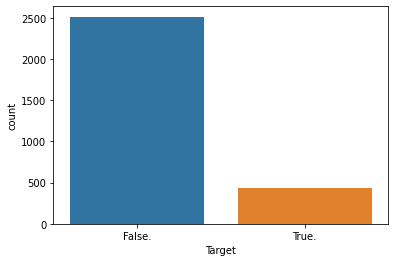

In [69]:
# bar chart
sns.countplot(df_train['Target'])

There is approximately 5X more False labels than True labels. This is not considered an extreme case of class imbalance. However, machine learning models work best with a balanced dataset. 

I will explore this imbalance by training a baseline Logistic Regression model on the original dataset while training other models with a slightly balanced dataset. This balanced dataset will be created with random undersampling of the False class and using SMOTE on the True class. In addition, adding a class weight to the True label is also an option that I will explore.

This label will be encoded to a binary 1 for True and 0 for False.

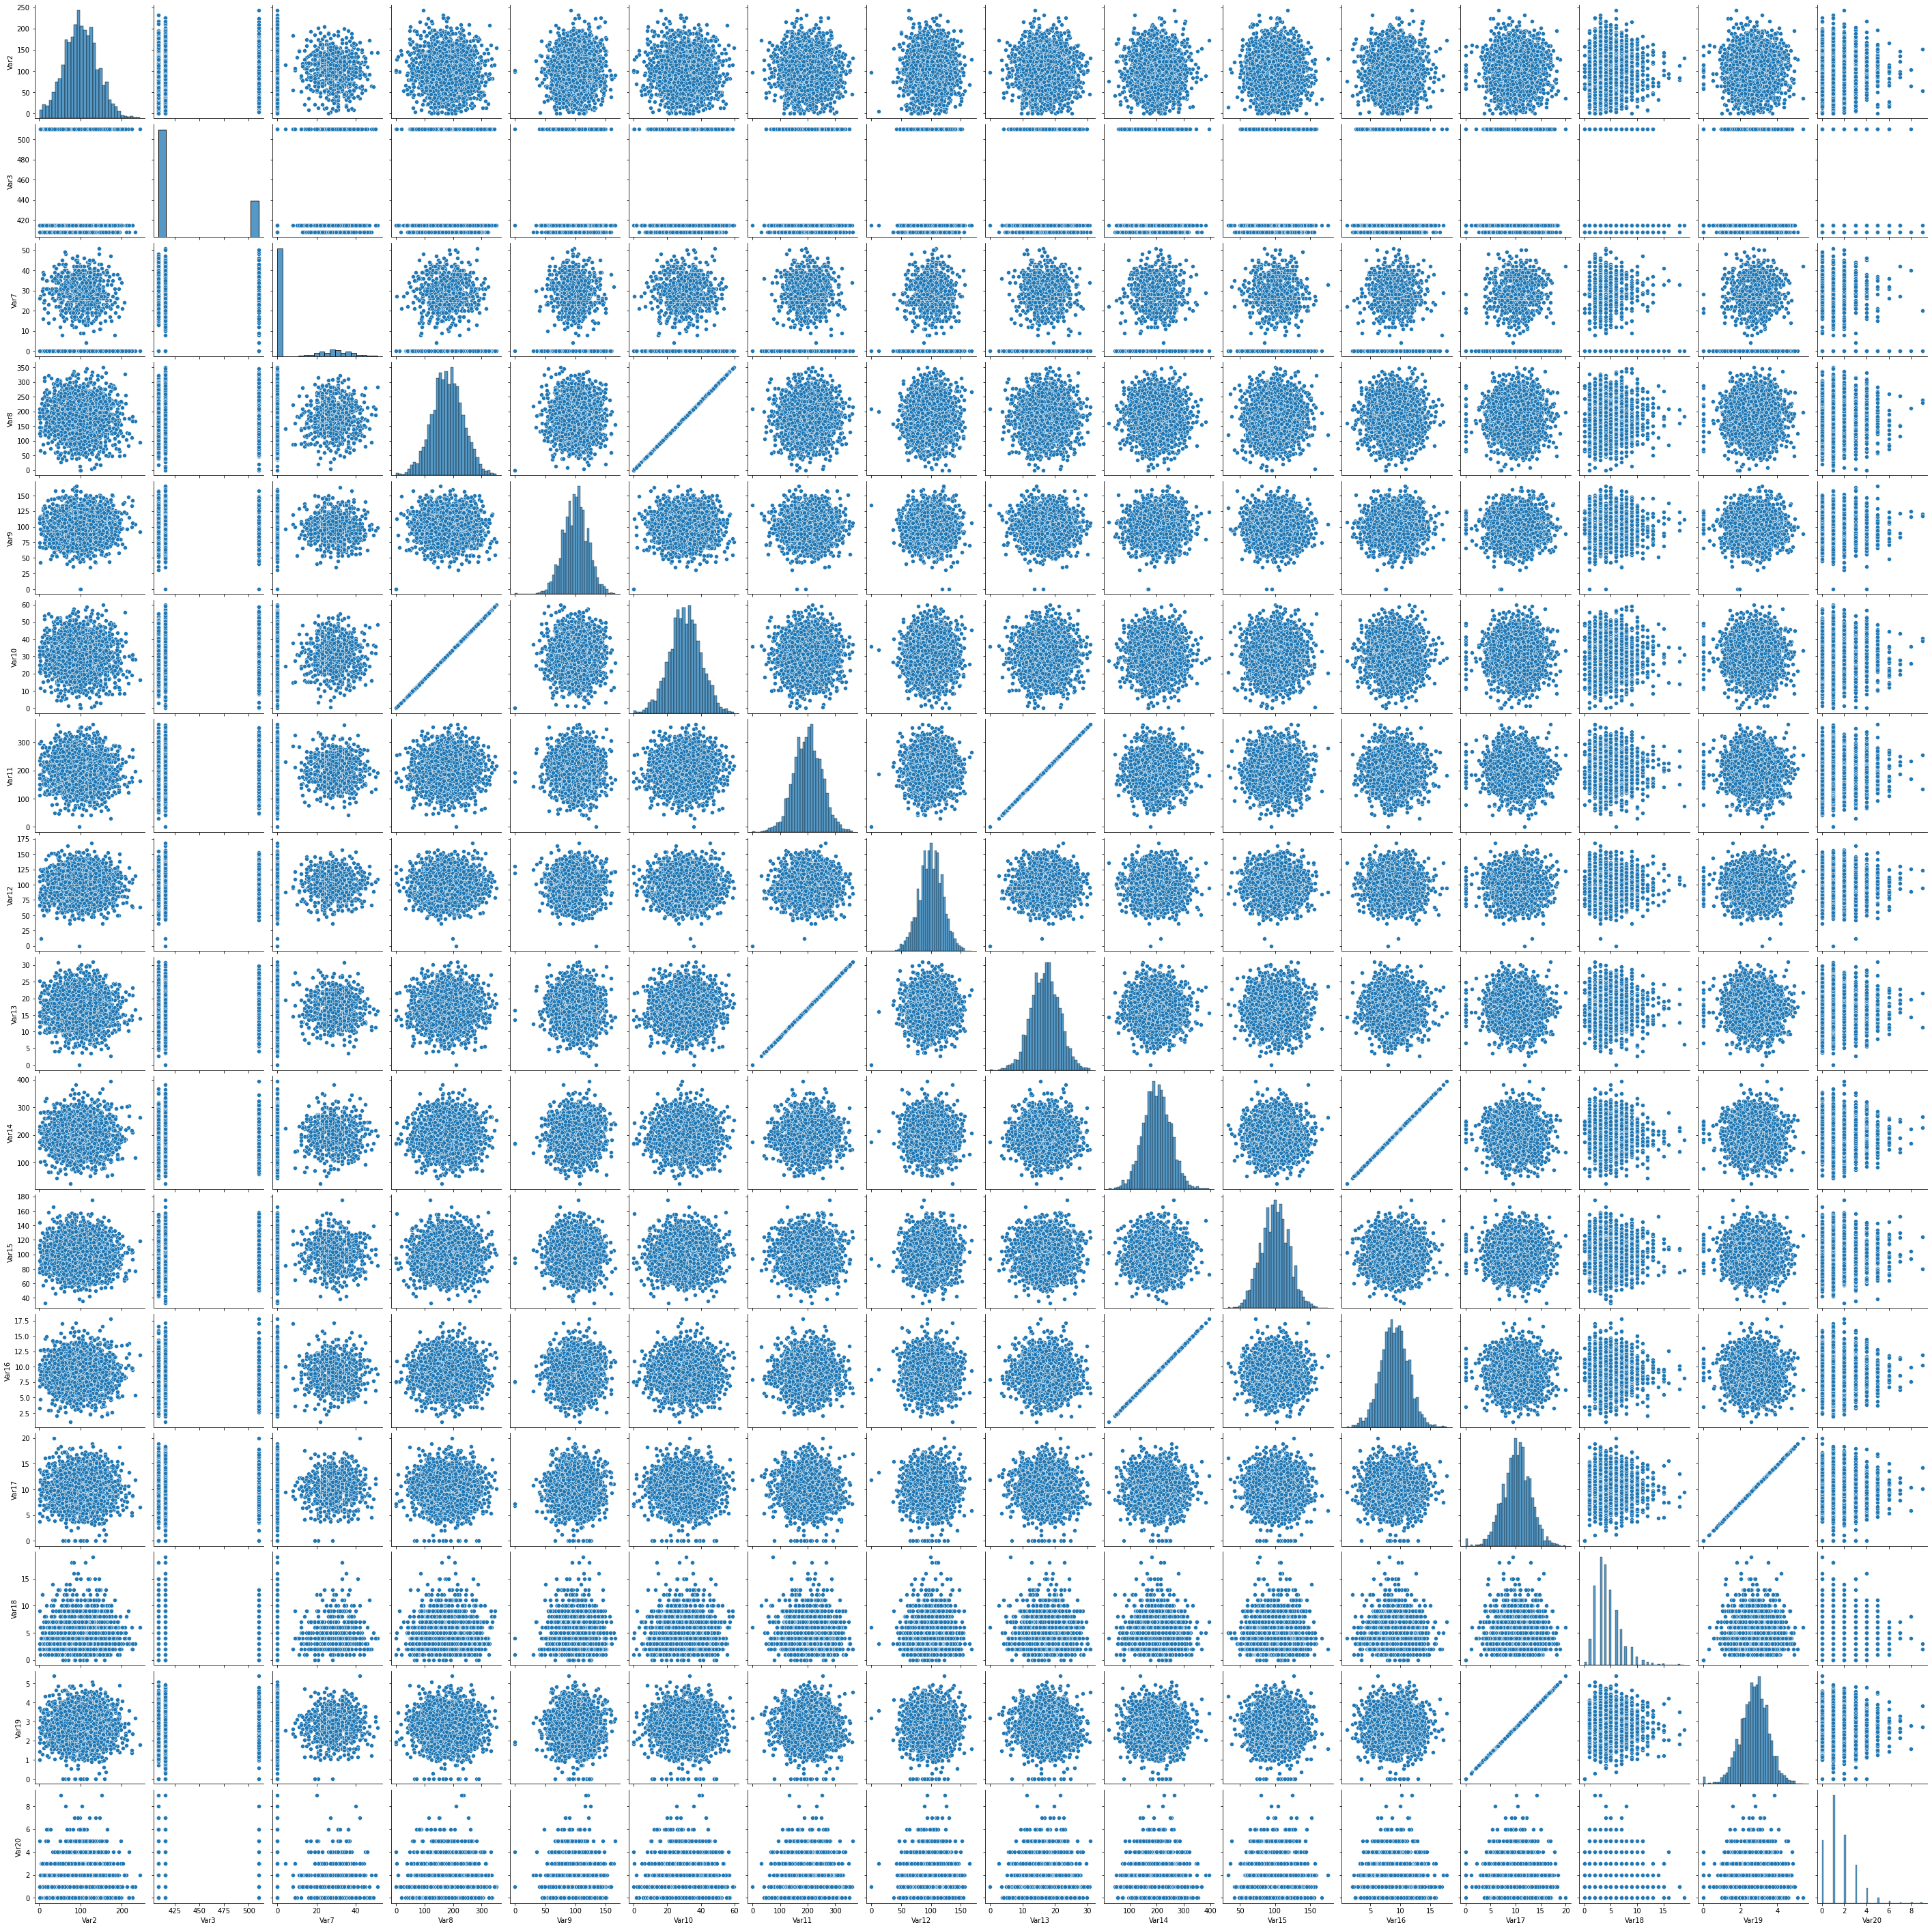

In [70]:
# Pairplot of dataframe

sns.pairplot(df_train)
plt.show()

Some Var features appear to have a good linear relationship with one another, this will be explored further with a correlation plot.

### Numerical Features

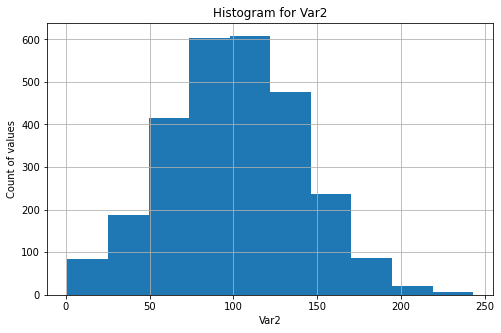

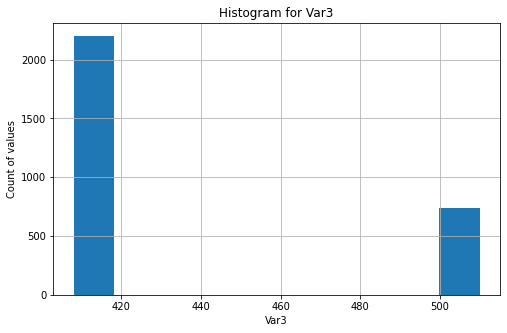

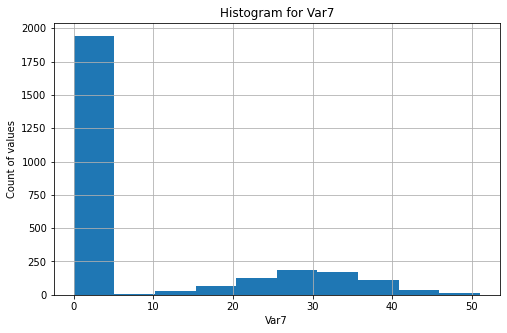

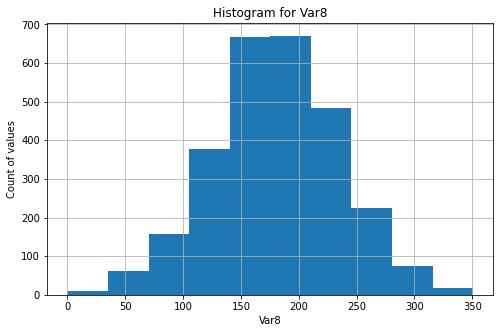

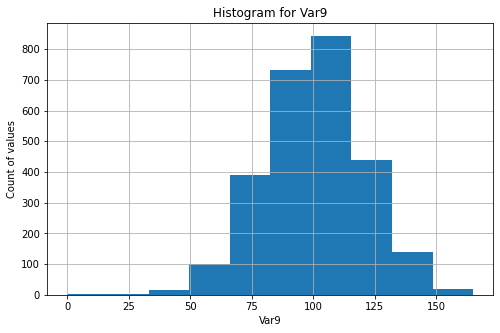

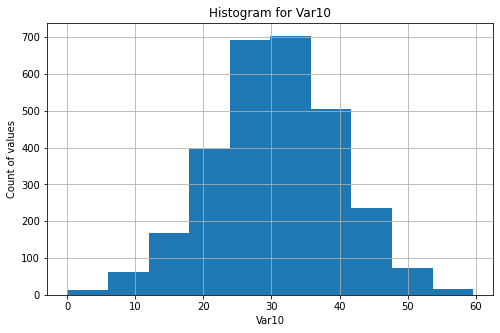

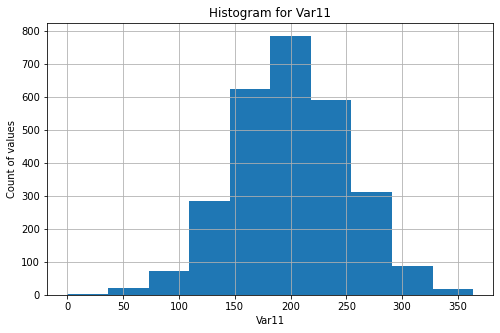

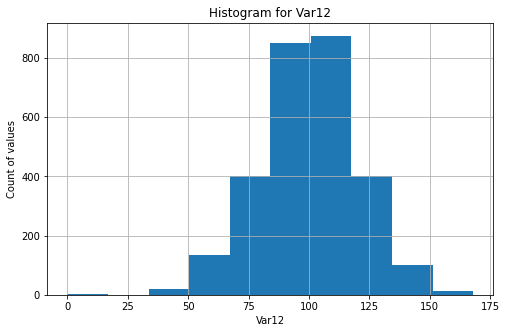

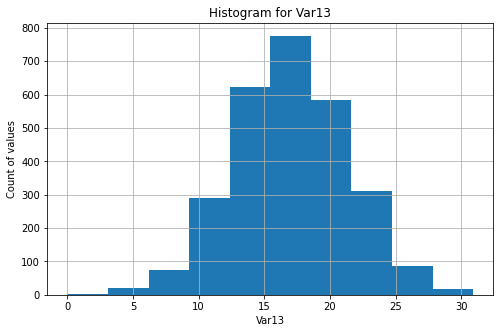

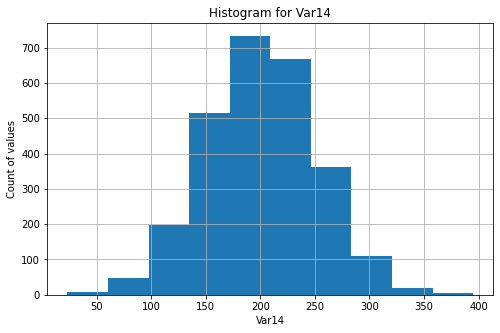

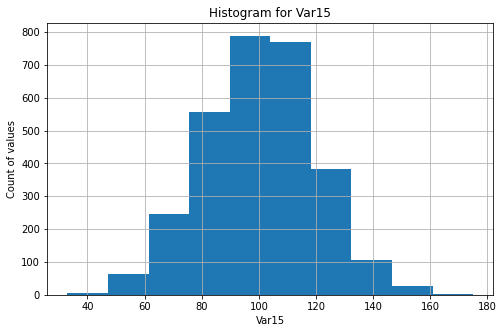

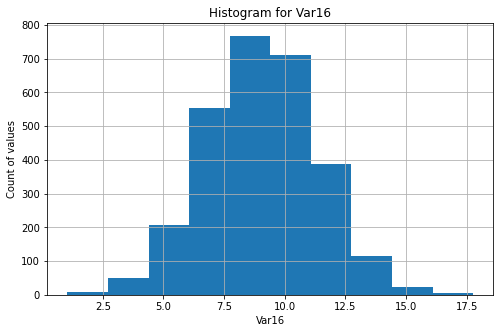

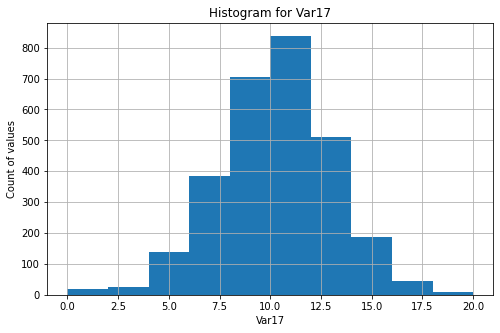

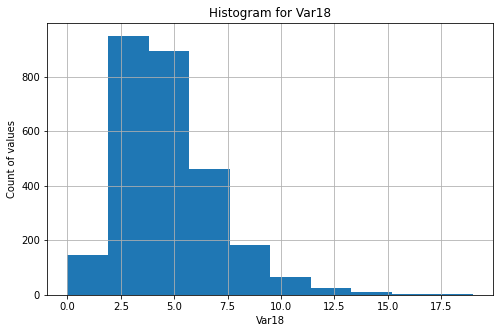

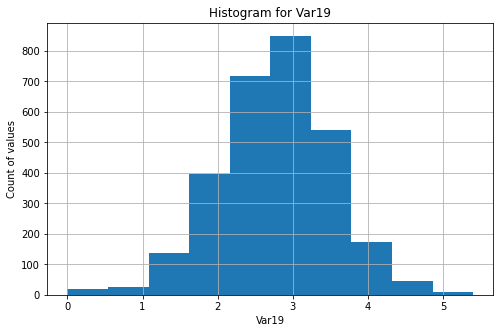

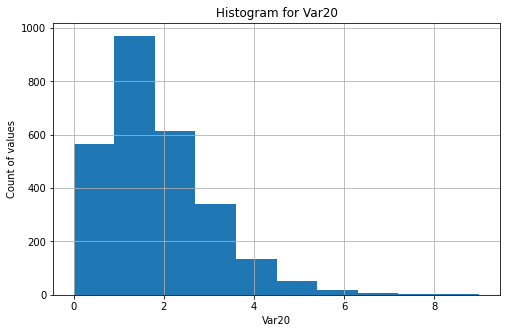

In [71]:
# Exploring numerical features

numerical_features = df_train.select_dtypes(include='float64')
for c in numerical_features:
    numerical_features[c].hist(figsize=(8,5))
    plt.title('Histogram for '+c)
    plt.xlabel(c)
    plt.ylabel('Count of values')
    plt.show()

Var 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 follow a normal distribution.  
Var 3 and 7 need some further exploration.

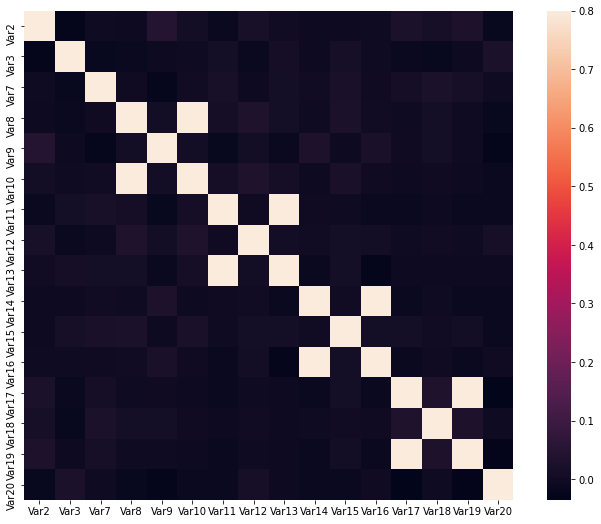

In [72]:
# Correlation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

As seen from the pairplot above, Var (8 and 10), (11 and 13), (14 and 16), (17 and 19) appear to be highly correlated. Var 10, 13, 16, and 19 can be dropped as features as keeping them will lead to multi-collinearity.

### Categorical Features

In [73]:
# Summary statistics for categorical features

categorical_features = df_train.select_dtypes(exclude='float64')
for c in categorical_features:
    # Shows percentage of each value in each feature
    print(df_train[c].value_counts(normalize=True) * 100)

S1    3.261268
W3    2.968120
M5    2.601686
W4    2.565042
O1    2.381825
N8    2.345181
V1    2.345181
O3    2.308538
U1    2.308538
M4    2.271894
A2    2.271894
C3    2.271894
I2    2.235251
T2    2.198608
V2    2.198608
I4    2.198608
K1    2.198608
W2    2.198608
M8    2.161964
F1    2.125321
N7    2.088677
N5    2.052034
N1    2.052034
C2    2.015390
R1    2.015390
M2    2.015390
A4    1.942103
N3    1.905460
M6    1.905460
W1    1.905460
K2    1.905460
N6    1.868816
N2    1.832173
M7    1.795529
M1    1.795529
D2    1.758886
M3    1.758886
G1    1.685599
O2    1.685599
I3    1.685599
H1    1.648956
A1    1.648956
A3    1.575669
N4    1.575669
D1    1.575669
P1    1.539025
T1    1.502382
L1    1.429095
I1    1.319165
C1    1.099304
Name: Var1, dtype: float64
6350bb6681402f4b1be2143a68103682    0.036711
16a903ec1f228851ad0f16d41e6e9a08    0.036711
ba40a95f268e554bbd0e216150861f8e    0.036711
e6b3bca0bf8499f5253a7d08086395bc    0.036711
25079d99cd0882e79824c576002d3e29    0.03671

Var 4 seems to be a high cardinality hashed feature. These values could potentially be mapped using a hashing function, or this feature can be dropped to reduce its dimensionality. 

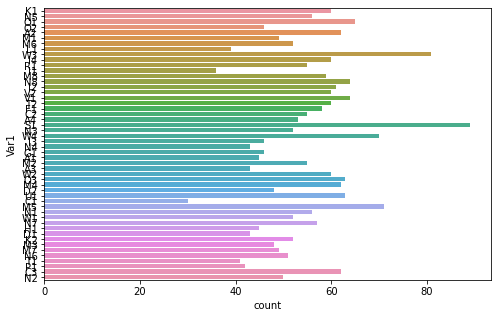

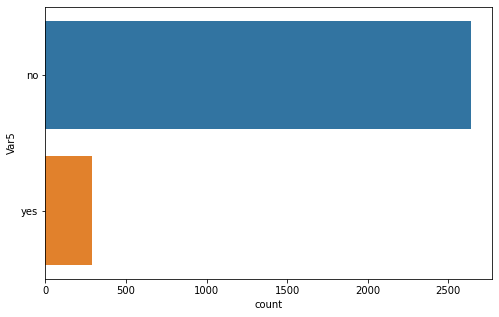

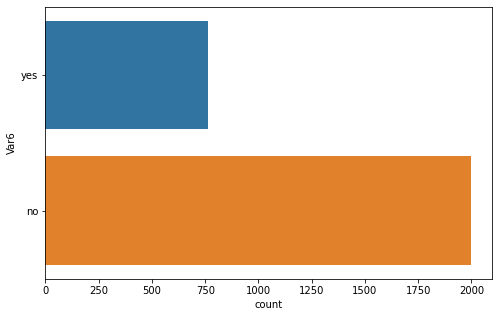

In [74]:
# Categorical features without Var4

categorical_features = categorical_features.drop(["Var4", "Target"], axis=1)
for c in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(y=c, data=df_train)
    plt.show()

Var 1 has multiple classes per category, and from its values, it doesn't seem that there is an ordering. This feature column can potentially be one-hot encoded with its missing values being given an additional class. However, as this feature has high cardinality, one-hot encoding this feature could possibly lead to the "curse of dimensionality" and as there is no defined business use case, I will drop this column.


The Var 5, 6 columns can be label encoded as they are binary values.

### Missing Values

<AxesSubplot:>

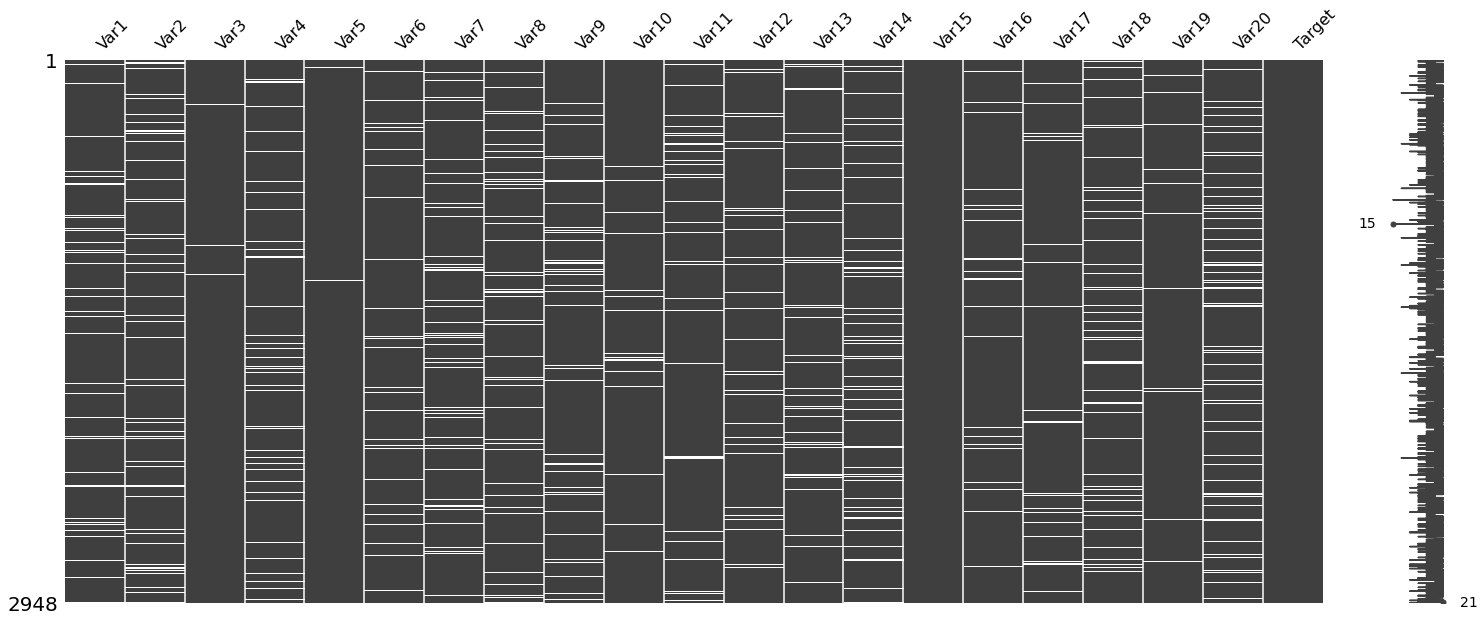

In [75]:
# Visualize missing values

msno.matrix(df_train)

In [76]:
# Missing data

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Var14     282  9.565807
Var7      269  9.124830
Var9      265  8.989145
Var20     241  8.175034
Var2      227  7.700136
Var4      224  7.598372
Var1      219  7.428765
Var18     208  7.055631
Var8      207  7.021710
Var6      188  6.377205
Var13     163  5.529172
Var11     161  5.461330
Var12     153  5.189959
Var16     122  4.138399
Var17      88  2.985075
Var10      82  2.781547
Var19      39  1.322931
Var5       20  0.678426
Var3        6  0.203528
Var15       1  0.033921
Target      0  0.000000

As 'Var4' is a hashed value, the null rows do not capture any pertinent information and will be dropped.

With 'Var5' and 'Var6' being categorical columns, the nulls from these 2 columns will be dropped.

Finally, there are only a handful of missing observations in 'Var15' and 'Var3. Since these are only a handful, the null observations can be deleted and the variable kept.

Based on the distribution of Var7, its nulls can be imputed with the median.

In [77]:
df_train_non_missing = df_train.drop(["Var10", "Var13", "Var16", "Var19"], axis=1)
df_train_non_missing = df_train_non_missing.dropna(subset=['Var5', 'Var6', 'Var15', 'Var3', 'Var4'])
print(df_train_non_missing.isnull().sum())
print(df_train_non_missing.shape)

Var1      187
Var2      204
Var3        0
Var4        0
Var5        0
Var6        0
Var7      222
Var8      175
Var9      236
Var11     138
Var12     136
Var14     245
Var15       0
Var17      80
Var18     180
Var20     212
Target      0
dtype: int64
(2525, 17)


For the remaining null values in the Var feature columns, to prevent further loss of information and data, these numerical columns will have their nulls imputed with each column's mean.

### Outliers

415.0    1466
510.0     740
408.0     736
Name: Var3, dtype: int64
0.0     1941
31.0      51
28.0      44
29.0      38
27.0      37
26.0      36
33.0      35
30.0      32
24.0      31
32.0      30
23.0      29
35.0      28
36.0      26
37.0      24
39.0      24
34.0      24
21.0      23
25.0      23
38.0      22
22.0      22
20.0      20
19.0      18
40.0      14
42.0      13
17.0      12
16.0      12
15.0       9
41.0       7
43.0       7
14.0       6
44.0       5
45.0       5
12.0       5
18.0       4
46.0       3
13.0       3
48.0       2
47.0       2
11.0       2
8.0        2
50.0       2
9.0        2
4.0        1
10.0       1
51.0       1
49.0       1
Name: Var7, dtype: int64


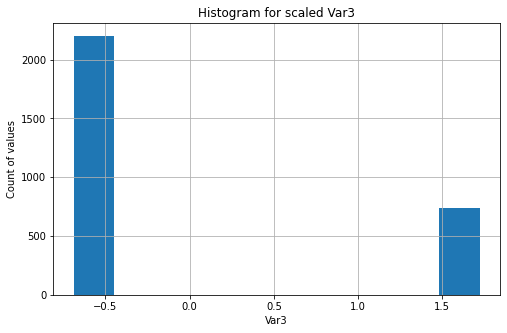

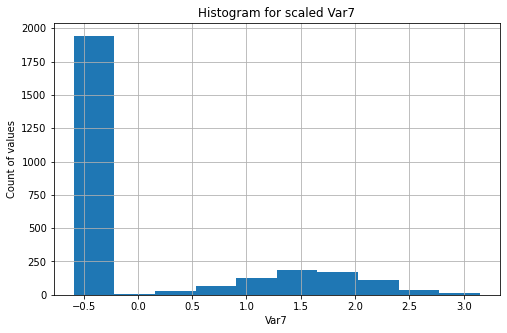

In [78]:
standard_cols = ['Var3', 'Var7']

# Testing Var 3 and 7.
for c in standard_cols:
    print(df_train[c].value_counts())

# Standardize both features and perform a bar plot
df_scaled = df_train.copy()
for c in standard_cols:
    df_scaled[c] = StandardScaler().fit_transform(np.array(df_scaled[c]).reshape(-1,1))
    df_scaled[c].hist(figsize=(8,5))
    plt.title('Histogram for scaled '+c)
    plt.xlabel(c)
    plt.ylabel('Count of values')
    plt.show()

It seems that values for Var3 fall into 3 categories. This numerical column can be mapped into a categorical one with any unknown values that can be assigned a new category. This feature can then be one-hot encoded.

Three quarters of Var7 have the same value. An option to handle this could be to convert this feature into a binary bin with values that are non-zero being coded to 1.

## Preprocessing

I decided to split the dataset and then perform feature engineering to minimize data leakage between the training and testing sets.

As the variables of the dataset have different scales, I will perform data normalization on the feature columns after the engineering steps.

In [104]:
def process_label(df):
    # Drop nulls from target column
    df = df[df['Target'].notna()]
    # Drop nulls so dataframes for X and y are the same size
    df = df.dropna(subset=['Var5', 'Var6', 'Var15', 'Var3'])
    df['Target'] = df['Target'].map({'True.': 1, 'False.': 0, 'True': 1, 'False': 0})
    return df

# Process dataframe
df_train = process_label(df_train)

In [80]:
# Train-test split
X = df_train.drop('Target', axis=1)
y = df_train['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


def process_features(df):
    df = df.copy()
    # Drop highly correlated features
    df = df.drop(["Var10", "Var13", "Var16", "Var19"], axis=1)
    # Drop high cardinality features
    df = df.drop(["Var1", "Var4"], axis=1)
    
    # label encode categorical columns
    label_encode = ["Var5", "Var6"]
    for c in label_encode:
        df[c] = df[c].map({'yes': 1, 'no': 0})
    
    # Handle missing data
    # Impute chosen columns' nulls with their respective mean
    mean_impute_cols = ['Var2', 'Var8', 'Var9', 'Var11', 'Var12', 'Var14', 'Var17', 'Var18', 'Var20']
    for c in mean_impute_cols:
        df[c] = df[c].replace(np.NaN, df[c].mean())  # Potentially use SimpleImputer
    
    # Convert Var3 and Var7
    df['Var3'] = df['Var3'].map({415.0: '2', 510.0: '3', 408.0: '1'})
    df['Var7'] = df['Var7'].apply(lambda x: 1.0 if x != 0.0 else 0.0)
    
    # Select numerical columns for MinMaxScaling
    numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
    
    # One-hot encode Var3 and perform MinMaxScaling
    column_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), ['Var3']), 
        (MinMaxScaler(), numerical_ix),
        remainder='passthrough'
    )
    df = column_trans.fit_transform(df)
    return df


def balance_dataset(X, y):
    # SMOTE True class
    # Oversample the minority class to have 40% the number of examples of the majority class
    over = SMOTE(sampling_strategy=0.4)
    # Random undersampling of False
    # Reduce the number of examples in the majority class to have 50% more than the minority class
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # Transform the dataset
    X, y = pipeline.fit_resample(X, y)
    return X, y

<AxesSubplot:xlabel='Target', ylabel='count'>

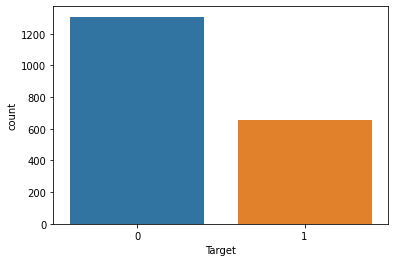

In [81]:
# Unbalanced & processed
X_train_proc = process_features(X_train)
X_test_proc = process_features(X_test)


# Balanced & processed
X_train_bal, y_train_bal = balance_dataset(X_train_proc, y_train)
X_test_bal, y_test_bal = balance_dataset(X_test_proc, y_test)

# View distribution of balanced dataset
sns.countplot(y_train_bal)

In [82]:
X_train_proc.shape

(1913, 16)

After using SMOTE and random undersampling, the balance of the dataset has gone from 5:1 to approximately 2.25:1. This represents a minor improvement and will be explored further with the training pipeline. The dataset was not dalanced at 1:1 because this would result in the loss of many data points and the creation of many synthetic data points which might not reflect real world values.

## Training

As a baseline, I will consider a Logistic Regression model trained on the non-balanced and a non-preprocessed dataset.  
I will train the datasets on 5 different models that are stored in the models_dict.

### Evaluation Metrics

Banks provide solutions to a high number of customers. As the scope and business use case of this project is not given, I have to make an assumption that this exercise falls in line with either a customer churn or a fraud detection application which are common use cases for banks. For these use cases, choosing an evaluation metric is of utmost importance. 

In terms of customer churn, there are no significant consequences of identifying a customer as a churn risk when he/she isn't. However, to reduce excessive costs, customer confusion and possibly unneeded churn. It is a good benchmark to have a precision score of above 80% for a trained model. In this case, precision is the metric of choice because we want to miss as few of the true churn cases as possible.

In terms of fraud detection, it would be a problem if the model wrongly predicted a transaction to be genuine instead of fraud. Thus the cost of False Negatives (Observation is Positive, but the model classified it as Negative - Transaction is predicted as non-fraud but is actually fraud) is much higher than the cost of False Positives (Observation is Negative, but the model classified it as Positive - Transaction is predicted as fraud but is actually non-fraud). In this scenario, it is advised to choose recall as an evaluation metric.  

Thus as the specific use case is not clear, the f1-score is chosen as an evaluation metric over accuracy because it is the weighted average of Precision and Recall.

In [83]:
# Run baseline model on dataset

def baseline(df):
    df = df.copy()
    df = df.dropna()
    numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
    df = df[numerical_ix]
    X = df.drop('Target', axis=1)
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    results = f1_score(pred, y_test)
    return results

print(f"Baseline f1-score is: {baseline(df_train)}")

Baseline f1-score is: 0.16666666666666669


In [84]:
def neural_network():
    # define the layers
    x_in = Input(shape=(16,))  # 16 is number of columns after processing
    x1 = layers.Dense(64, activation="relu")(x_in)
    d = layers.Dropout(0.2)(x1)
    x2 = layers.Dense(32, activation="relu")(d)
    x_out = layers.Dense(1, activation="sigmoid")(x2)
    # define the model
    model = Model(inputs=x_in, outputs=x_out)
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # 'accuracy' might not be most efficient metric for the neural network.
    # However with a known use case, this can be replaced with 'precision' or 'recall'
    return model

In [85]:
# Make dict of models
models_dict = {
    "logistic_regression": LogisticRegression(max_iter=1000),
    "svm": LinearSVC(C=0.0001),
    "random_forest": RandomForestClassifier(n_estimators=30, max_depth=9),
    "xgboostclassifier": XGBClassifier(n_estimators=30, max_depth=9),
    "neural_network": KerasClassifier(build_fn=neural_network, verbose=0)
}

# Models with a class weighting: to be used with a processed dataset only
models_weighted_dict = {
    "weighted_logistic_regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "weighted_svm": LinearSVC(C=0.0001, class_weight='balanced'),
    "weighted_random_forest": RandomForestClassifier(n_estimators=30, max_depth=9, class_weight='balanced'),
    "weighted_xgboostclassifier": XGBClassifier(n_estimators=30, max_depth=9, scale_pos_weight=5.9)
}

Adding a 'class_weight' parameter can also be done for a neural network, but it is parsed through the '.fit' parameter. As I am using a pipeline to parse X_train, and y_train, I will skip using a weighted neural network for this exercise.

### Results

#### Processed dataset + base models

In [86]:
get_features = FunctionTransformer(process_features)

base_models = models_dict.copy()
for key, classifier in base_models.items():
    print(f"Model: {classifier}")
    pipe = make_pipeline(get_features, classifier)
    # fit the pipeline on the transformed data
    pipe.fit(X_train, y_train)   
    # make predictions
    y_pred = pipe.predict(X_test)
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n{classification_report(y_test, y_pred)}")

LogisticRegression(max_iter=1000)
Results for logistic_regression
Confusion matrix: 
[[680   9]
 [112  19]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       689
           1       0.68      0.15      0.24       131

    accuracy                           0.85       820
   macro avg       0.77      0.57      0.58       820
weighted avg       0.83      0.85      0.81       820

LinearSVC(C=0.0001)
Results for svm
Confusion matrix: 
[[689   0]
 [131   0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       689
           1       0.00      0.00      0.00       131

    accuracy                           0.84       820
   macro avg       0.42      0.50      0.46       820
weighted avg       0.71      0.84      0.77       820

RandomForestClassifier(max_depth=9, n_estimators=30)
Results for random_forest
Confusion matrix: 
[[679  10]
 [ 

#### Processed dataset + balanced dataset + base models

In [87]:
balanced_models = models_dict.copy()
for key, classifier in balanced_models.items():
    print(f"Model: {classifier}")
    classifier.fit(X_train_bal, y_train_bal)
    y_pred = classifier.predict(X_test_bal)
    print(f"Confusion matrix: \n{confusion_matrix(y_test_bal, y_pred)}")
    print(f"Classification report: \n{classification_report(y_test_bal, y_pred)}")

Model: logistic_regression
Confusion matrix: 
[[509  41]
 [178  97]]
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       550
           1       0.70      0.35      0.47       275

    accuracy                           0.73       825
   macro avg       0.72      0.64      0.65       825
weighted avg       0.73      0.73      0.71       825

Model: svm
Confusion matrix: 
[[550   0]
 [275   0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       550
           1       0.00      0.00      0.00       275

    accuracy                           0.67       825
   macro avg       0.33      0.50      0.40       825
weighted avg       0.44      0.67      0.53       825

Model: random_forest
Confusion matrix: 
[[527  23]
 [102 173]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.96 

#### Processed dataset + models with class weights

In [88]:
for key, classifier in models_weighted_dict.items():
    print(f"Model: {classifier}")
    pipe = make_pipeline(get_features, classifier)
    # fit the pipeline on the transformed data
    pipe.fit(X_train, y_train)   
    # make predictions
    y_pred = pipe.predict(X_test)
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n{classification_report(y_test, y_pred)}")

LogisticRegression(class_weight='balanced', max_iter=1000)
Results for weighted_logistic_regression
Confusion matrix: 
[[571 118]
 [ 44  87]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       689
           1       0.42      0.66      0.52       131

    accuracy                           0.80       820
   macro avg       0.68      0.75      0.70       820
weighted avg       0.85      0.80      0.82       820

LinearSVC(C=0.0001, class_weight='balanced')
Results for weighted_svm
Confusion matrix: 
[[249 440]
 [ 17 114]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.36      0.52       689
           1       0.21      0.87      0.33       131

    accuracy                           0.44       820
   macro avg       0.57      0.62      0.43       820
weighted avg       0.82      0.44      0.49       820

RandomForestClassifier(class_weight='balance

Based on the f1-score as an evaluation metric, the following models have decent results:
- XGBoost Classifier (trained on balanced dataset) - 0.78
- Random Forest (trained on balanced dataset) - 0.73
- weighted XGBoost Classifier (trained on the processed dataset) - 0.72

All the models above have higher precision over recall scores for the minority (True) class.  
Using a balanced dataset, or a weighted model does result in higher scores over the basic processed dataset and a major improvement over the baseline non-processed logistric regression model with a f1-score of 0.17.

## Testing

As a rule of thumb, it is not advised to balance the testing dataset because we do not want to create synthetic values for inference.

F1-score is the chosen metric for testing the trained model.

In [96]:
# Load model
model = balanced_models["xgboostclassifier"]

In [105]:
# Read test dataset
df_test = pd.read_csv('./data/dataset_train_1.csv', index_col=[0])

# Perform preprocessing on test set
df_test = process_label(df_test)
test_X = df_test.drop('Target', axis=1)
test_y = df_test['Target']
test_X = process_features(test_X)

### Evaluate on chosen metric

In [106]:
y_pred = model.predict(test_X)
print(f"Confusion matrix: \n{confusion_matrix(test_y, y_pred)}")
print(f"Classification report: \n{classification_report(test_y, y_pred)}")

Confusion matrix: 
[[2228   98]
 [  37  370]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2326
           1       0.79      0.91      0.85       407

    accuracy                           0.95      2733
   macro avg       0.89      0.93      0.91      2733
weighted avg       0.95      0.95      0.95      2733



The results from the test dataset are healthy with a 0.85 f1-score, high precision, recall and accuracy scores.  
Thus this model performs well for this task.

## Future Work

- Define clear business use case and problem statement.
- Perform further feature engineering
    - Determine usability of features with high cardinality
        - Var1: one-hot Encoding
        - Var4: Hashing Encoding
- Hyper-parameter tuning with grid-search/ hyperopt.
- Evaluate models with cross validation/ k-fold.
- Explore addition of regularization on models (l1, l2, batch_norm layer).
- Explore usage of an emsemble of models.
- Add validation dataset for neural network training with early stopping.
- Create more robust end to end training and inference pipeline that better handles data drift.
- Explore feature importances and perform PCA.
- Implement code in a python script environment with utils, config and source files using VS Code.
- Create unit tests.